In [96]:
# Import numerical resources
import numpy as np
import random as rn

# Import graphics resources
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib notebook

In [97]:
x = np.linspace(0,1.0,9); print x
dx = x[1]-x[0]; print dx

[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875  1.   ]
0.125


In [98]:
D = 1.0

In [99]:
dt = dx**2/2/D / 10; print dt
nt = 50 # Number of time steps
t = dt*nt; print t

0.00078125
0.0390625


In [100]:
C = (dt * D) / (dx**2); print C # For constants in "propagate" function 

0.05


In [101]:
# Starting f(t,x) as 2-D array of random numbers; pseudo: f[time][x]; n = 0 row stores initial field

f = np.array([[rn.random() for i in range(len(x))] for j in range(int(t/dt)+1)]); print f; # Adding a time row to include intial field

[[ 0.69005337  0.64869661  0.8702348   0.67337023  0.28666631  0.20011048
   0.78404176  0.7513444   0.83000353]
 [ 0.37392391  0.43810882  0.44113729  0.26558845  0.13486948  0.39736131
   0.05316744  0.81049348  0.75147531]
 [ 0.6954774   0.58161316  0.5526987   0.38248924  0.68609712  0.4656558
   0.85767547  0.1045032   0.26429632]
 [ 0.86604356  0.55589815  0.92278188  0.24701003  0.40528125  0.16681875
   0.03379593  0.1741089   0.88620137]
 [ 0.74367844  0.58818033  0.65170146  0.57981873  0.90356963  0.809191
   0.7990858   0.53697135  0.49747842]
 [ 0.00718751  0.92551192  0.50690761  0.3096548   0.8087948   0.92163067
   0.70958809  0.79318198  0.34263888]
 [ 0.63227734  0.21932563  0.58805566  0.76865719  0.85754877  0.11012485
   0.7181905   0.73717421  0.23604119]
 [ 0.27108655  0.20692174  0.834374    0.32417032  0.15790997  0.71351495
   0.36144742  0.85279468  0.02951818]
 [ 0.57651738  0.71547123  0.62121434  0.11417847  0.66410335  0.36032658
   0.55219319  0.1216221 

In [102]:
# Function that iterates diffusion values through number of time steps
def propagate(f, nt, dt):
    # nt = len(f) - 1 # not including initial field in number of time steps
    # print nt
    t_tot = [0.0]
    t = 0.0
    for n in range(0, nt) :
        t += dt
        t_tot.append(t)
        for k in range(0, len(x)):
            f_pre = f[n][k] 
            if k == 0:
                f[n+1][k] = C * ( f[n][len(x)-1] - 2*f_pre + f[n][k+1] ) + f_pre
                # print 'hi'

            elif k == (len(x) - 1):
                f[n+1][k] = C * ( f[n][k-1] - 2*f_pre + f[n][0] ) + f_pre
                # print'hello'
            else:
                f[n+1][k] = C * ( f[n][k-1] - 2*f_pre + f[n][k+1] ) + f_pre
                # print 'hey'
                
    return f, t_tot

In [103]:
f, t_tot = propagate(f,nt,dt)
xgrid, tgrid = np.meshgrid(x,t_tot)

%whos

Variable    Type             Data/Info
--------------------------------------
Axes3D      type             <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
C           float64          0.05
D           float            1.0
ax          Axes3DSubplot    Axes(0.125,0.1;0.775x0.8)
dt          float64          0.00078125
dx          float64          0.125
f           ndarray          51x9: 459 elems, type `float64`, 3672 bytes
fig         Figure           Figure(640x480)
i           int              8
j           int              50
np          module           <module 'numpy' from '//a<...>ages/numpy/__init__.pyc'>
nt          int              50
plt         module           <module 'matplotlib.pyplo<...>s/matplotlib/pyplot.pyc'>
propagate   function         <function propagate at 0x121d3ac80>
rn          module           <module 'random' from '//<...>ib/python2.7/random.pyc'>
t           float64          0.0390625
t_tot       list             n=51
tgrid       ndarray          51x9: 459 elems,

<IPython.core.display.Javascript object>


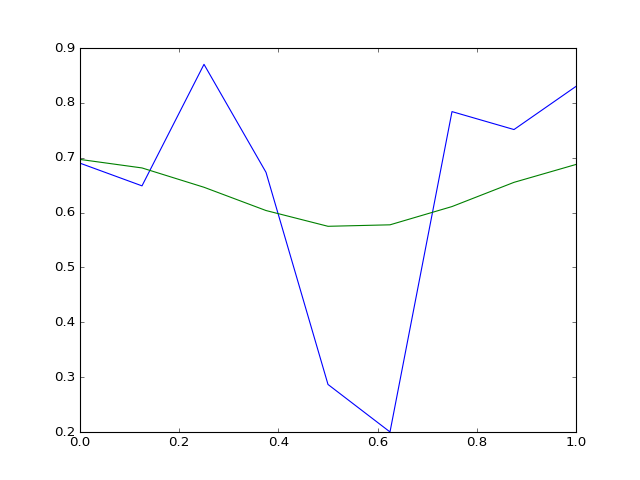

In [104]:
# This graphs first and last
plt.figure()
plt.plot(x,f[0])
plt.plot(x,f[-1])

<IPython.core.display.Javascript object>


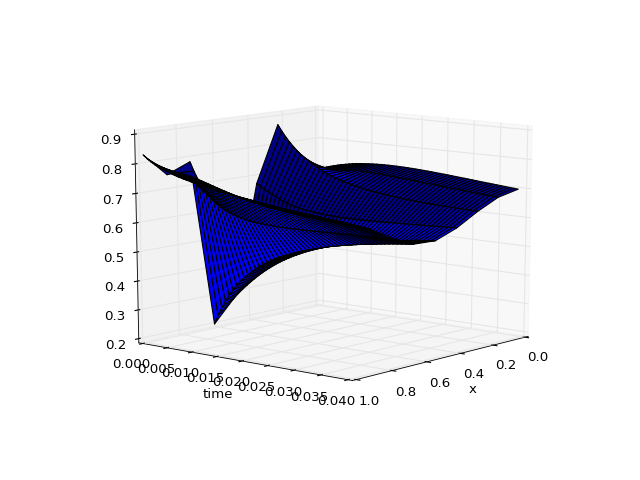

In [105]:
# This plots the solution as a function of time and space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xgrid, tgrid, f, rstride=1,cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('time')